Type of Sk-Learn methods on objects: The scikit learn API is divided into 3 complementary interfaces that share a common syntax and logic:

1.) Transformer

2.) Estimator

3.) Predictor

-->Sensible Defaults are given - even though no parameter is given

1.) Transform() -> transform the dataset

2.) fit()-> Learn the Parameter

3.) fit_transform()-> fits parameter and transform the data

Predictors -> Make prediction on the dataset

1.) predict() -> take dataset as input and return prediction

2.) score() -> mearsure the accuracy of predictions

Estimators: Estimates model parameters based on training data and hyper-parameter -
1.) fit()

Transformer - Pre-Processing

Predictors - Prdiction of Unseen Data ot Evaluation of a model

Estimators - Model Building




In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #train_test_split is Class
from sklearn.linear_model import LinearRegression #Linear Regression is a Class



In [3]:
#@title Run this cell to download the dataset.
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/data1.txt

In [7]:
data=pd.read_csv('data1.txt',header=None)
data.rename(columns={0:'Visitor_Count',1:'Revenue'},inplace=True)
data.head()

,Visitor_Count,Revenue
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Visitor_Count  97 non-null     float64
 1   Revenue        97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0, 0.5, 'Revenue in 10,000')

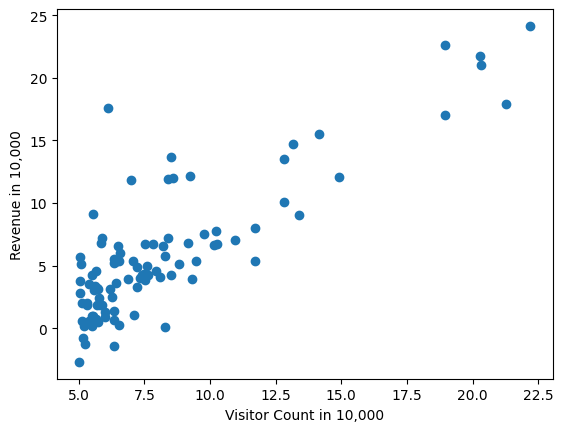

In [9]:
plt.scatter(data.Visitor_Count,data.Revenue)
plt.xlabel('Visitor Count in 10,000')
plt.ylabel('Revenue in 10,000')

In [10]:
## Saving a pandas table into excel file
data.to_excel('/content/df.xlsx') # '/content/df.xlsx'

In [11]:
data.head()

,Visitor_Count,Revenue
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


iLoc --> Integer Based Location

Loc --> label Based Location

In [12]:
data.iloc[:,0].values

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [13]:
data.loc[:,'Revenue'].values

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [12]:
XX= data['Visitor_Count'].values
XX

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [14]:
XX.shape ## In one dimensional array there is no concept of row and columns

NameError: name 'XX' is not defined

In [15]:
XX.reshape(1,97) #Twp Dimensional Array - if the arguments are interchanged, we get 97 Rows and 1 Column - but here is 1 Row and 97 Columns

NameError: name 'XX' is not defined

In [17]:
XX.reshape(1,-1) #Same as above - -1 represents n columns or Rows

array([[ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
         8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
         5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
        20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
        13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
         7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
        11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
         5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
         6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
        14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
        10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
         5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
         6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
         7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369]])

X is converted to 2D and Y remains in 1D - Why?

Answer: Sk_kearn model building API accecpts X in 2D and Y in 1D.

In [16]:
X=data.iloc[:,0].values.reshape(-1,1) # why in 2D
print(X.shape)

Y=data.iloc[:,1].values # why in 1D
m=len(Y)# gives number of training samples
print(m)

(97, 1)
97


Splitting the data into Train and Test - need train_test_Split

In [17]:
np.random.seed(0)
np.random.randint(1,5,4)

array([1, 4, 2, 1])

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y,test_size=0.25, random_state=0) #Random_state will select same sampled data evert time you run the progream

In [19]:
print(X_train.shape)
print(X_test.shape)

(72, 1)
(25, 1)


In [20]:
print(Y_train.shape)
print(Y_test.shape)

(72,)
(25,)


Using Linear Regression Now from Sk-Learn Library


In [21]:
reg = LinearRegression().fit(X_train, Y_train) # training step  by estimater API

In [22]:
m=reg.coef_  ## Gives coefficient
m

array([1.20934991])

In [23]:
c=reg.intercept_  ## gives intercepts
c

-4.106160513581714

In [24]:
# y  =  1.20934991  *  x  +   ( -4.106160513581714 ) ## Using ML
X_test

array([[12.828 ],
       [ 6.5159],
       [ 8.5186],
       [ 6.3589],
       [ 5.4994],
       [ 5.1884],
       [ 6.3654],
       [10.274 ],
       [ 6.3328],
       [ 8.2951],
       [ 7.6031],
       [ 5.0594],
       [ 7.3345],
       [ 8.4084],
       [ 8.5781],
       [ 5.2524],
       [ 5.4901],
       [ 5.5649],
       [ 5.8918],
       [ 6.4862],
       [ 5.7737],
       [21.279 ],
       [ 7.0032],
       [ 9.1802],
       [ 7.0931]])

In [25]:
y_pred=reg.predict(X_test) ## prediction for test set
y_pred

array([11.40738019,  3.7738426 ,  6.19580767,  3.58397466,  2.54453841,
        2.16843058,  3.59183543,  8.31870051,  3.55241063,  5.92551796,
        5.08864782,  2.01242444,  4.76381644,  6.06253731,  6.26776399,
        2.24582898,  2.53329145,  2.62375083,  3.01908731,  3.7379249 ,
        2.87626309, 21.62759632,  4.36315881,  6.99591357,  4.47187937])

In [26]:
Y_test

array([13.501  ,  5.3436 , 13.662  , -1.4211 ,  1.0173 ,  0.20421,
        5.3048 ,  6.7526 ,  1.4233 ,  5.7442 ,  4.9981 ,  2.8214 ,
        4.0259 ,  7.2258 , 12.     , -1.22   ,  4.263  ,  3.0825 ,
        1.8495 ,  6.5987 ,  2.4406 , 17.929  , 11.854  ,  6.7981 ,
        1.0463 ])

Calculating the accuracy Score

In [28]:
reg.score( X_test , Y_test)  ## coefficient of determination R^2 of the prediction ? - here X_test is passed to reg.Predict function, and the output y_pred is retain

0.5853498094619267

In [29]:
# ideal case when your predicted value equivalent to Y-test(ground thruth)
reg.score(X_test, y_pred) ## When Predicted value 'y_pred' is same as that of test value 'y_test' # ideal

1.0

## **Three Types of API**

Transformer - Interface  allows to transform the data needed needed by calling .fit() method initially that learns the parameters from training data and then applying .transform()

To Model an algotithm on sci-kit learn , the first step is to initialise the model class {e.g. linear regression, logistic regression, SVM} and fit it to the input data using an estimator, whish is fit() method.

Once the model has been trained, it is possible to predict new values using the predictor by calling the .predict() method and .score() method of the class

Scikit Learn Pipeline -

->Pass the data through the transformer to extract feartures

-> Pass to an Estimator to produce the model

-> Pass to Evaluate prediction to measure the acuuracy of the model


**Types of API and Modules**

Data API : Provides functionality for loading, generation and pre-processing the training and test data

Modules
sklearn.datasets,
sklearn.preprocessing,
sklearn.feature_selection/extraction,
sklearn.impute

Model Api - Provides supervised/unsupervised model

Modules:

 Regression : sklearn.linear_model, sklearn.trees

 Classification: sklearn.trees, sklearn.svm,sklearn.neighbours

#### Other methods for measuring accuracy

* Mean Absolute Error (MAE)

* Mean Squared Error (MSE)

* Root Mean Squared Error (RMSE)

Calculation of RMSE is shown below:

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
reg.fit(X_train, Y_train)   # Fitting the data  for generating Model

y_test_predict = reg.predict(X_test)  # prediction the output 'y' for each input 'x'
MSE = mean_squared_error(Y_test, y_test_predict)
print('Mean Squared Error = ', MSE)
RMSE=np.sqrt(mean_squared_error(Y_test, y_test_predict))
print('Root Mean Squared Error = ',RMSE)

Mean Squared Error =  9.829068168755809
Root Mean Squared Error =  3.1351344737914846


In [32]:
X[0] , Y[0]  # -->

(array([6.1101]), 17.592)

In [34]:
reg.predict(np.array([[6.1101]]))

array([3.2830884])

# #### Visualizing predicted and original y (Revenue)

97


<function matplotlib.pyplot.show(close=None, block=None)>

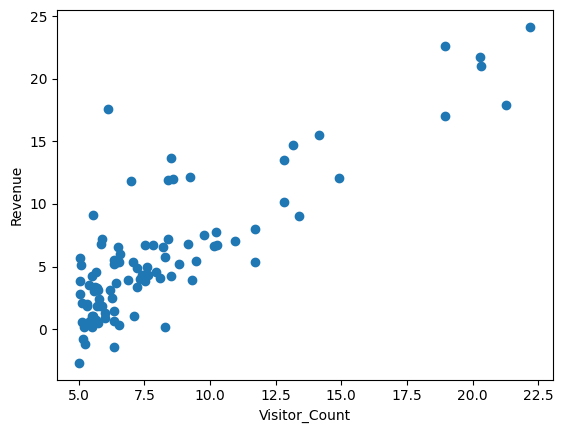

In [35]:
X=data.iloc[:,0].values
Y=data.iloc[:,1].values
m=len(Y)# gives number of training set
print(m)
plt.scatter(X,Y)
plt.xlabel('Visitor_Count')
plt.ylabel('Revenue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

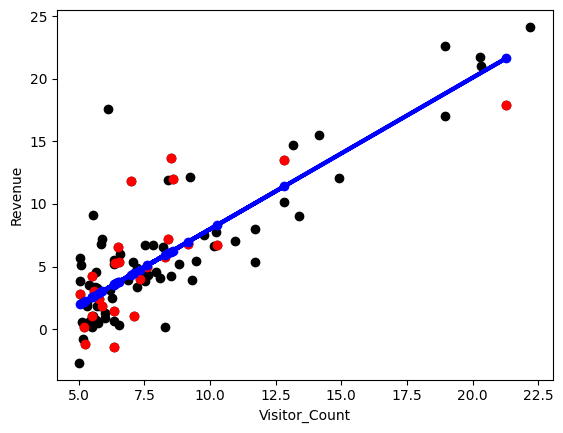

In [36]:
plt.scatter(X,Y,color='black')
plt.scatter(X_test, Y_test,  color='red')


plt.plot(X_test,y_pred, 'bo-', linewidth=3)


plt.xlabel('Visitor_Count')
plt.ylabel('Revenue')
plt.show

#### Predicting Revenue for any visitors count using the developed model

In [37]:
reg.predict(np.array([[10]]))

array([7.98733863])

## Logistic Regression  (Classification)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
# import required packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#@title Run this cell to download the dataset.
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/data3.txt

In [10]:
data=pd.read_csv('data3.txt',header=None)
data

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [11]:
## taking only integer values
for i in range(2):
  data[i]=data[i].astype('int')

In [43]:
data.head()

,0,1,2
0,34,78,0
1,30,43,0
2,35,72,0
3,60,86,1
4,79,75,1


In [50]:
X=data.iloc[:,0:2].values #.values becomes a numpy array
X


array([[34, 78],
       [30, 43],
       [35, 72],
       [60, 86],
       [79, 75],
       [45, 56],
       [61, 96],
       [75, 46],
       [76, 87],
       [84, 43],
       [95, 38],
       [75, 30],
       [82, 76],
       [69, 97],
       [39, 76],
       [53, 89],
       [69, 52],
       [67, 46],
       [70, 92],
       [76, 47],
       [67, 42],
       [89, 65],
       [50, 48],
       [34, 44],
       [77, 68],
       [62, 69],
       [80, 44],
       [93, 38],
       [61, 50],
       [38, 64],
       [61, 72],
       [85, 57],
       [52, 63],
       [52, 69],
       [40, 71],
       [54, 52],
       [33, 98],
       [64, 80],
       [74, 41],
       [34, 75],
       [83, 56],
       [51, 46],
       [94, 65],
       [82, 40],
       [51, 45],
       [62, 52],
       [77, 70],
       [97, 86],
       [62, 96],
       [91, 88],
       [79, 74],
       [99, 60],
       [90, 43],
       [34, 60],
       [50, 49],
       [49, 59],
       [97, 68],
       [32, 95],
       [74, 69

##### Separating data in two group: one for all Y=0 and another for all Y=1 and Plotting

In [45]:
data[2] == 1

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: 2, Length: 100, dtype: bool

In [53]:
data1=data[data[2] ==  1]

data2=data[data[2]==0]

data1

,0,1,2
3,60,86,1
4,79,75,1
6,61,96,1
7,75,46,1
8,76,87,1
9,84,43,1
12,82,76,1
13,69,97,1
15,53,89,1
16,69,52,1


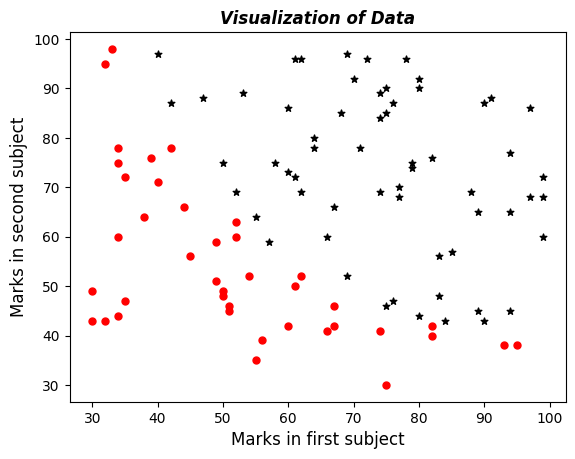

In [54]:
## Plotting
plt.scatter(data1[0],data1[1],color='k',s=25,marker='*') #All the data with Y=1,represented by Black,Admitted

plt.scatter(data2[0],data2[1],color='r',s=25,marker='o') # All data with Y=0 ,represented by Red,Rejected

plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Marks in first subject',fontsize=12)
plt.ylabel('Marks in second subject',fontsize=12)
plt.show()

### It can be plotted in another way

In [12]:
X=data.iloc[:,[0,1]]
print(X)
Y=data.iloc[:,2]
print(Y)

     0   1
0   34  78
1   30  43
2   35  72
3   60  86
4   79  75
..  ..  ..
95  83  48
96  42  87
97  99  68
98  55  64
99  74  89

[100 rows x 2 columns]
0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: 2, Length: 100, dtype: int64


In [71]:
X[0]

0     34
1     30
2     35
3     60
4     79
      ..
95    83
96    42
97    99
98    55
99    74
Name: 0, Length: 100, dtype: int64

In [72]:
Y

0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: 2, Length: 100, dtype: int64

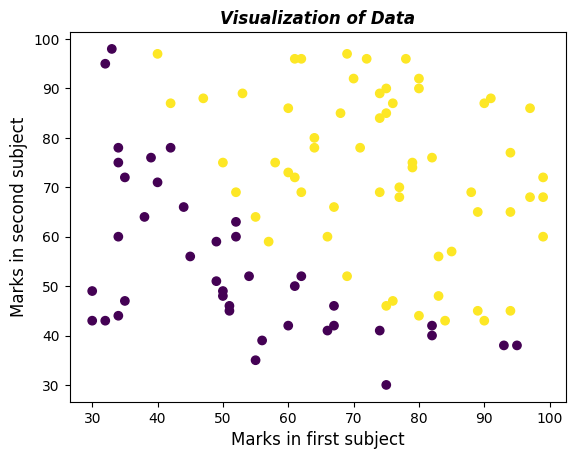

In [73]:
plt.scatter(X[0],X[1],c=Y)
plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Marks in first subject',fontsize=12)
plt.ylabel('Marks in second subject',fontsize=12)
plt.show()

In [13]:
clf = LogisticRegression()#  random_state=42, solver='lbfgs',multi_class='multinomial')
clf.fit(X,Y)

LogisticRegression()

In [14]:
clf.predict([[50,40]])

array([0])

In [15]:
clf.score(X, Y) ## it is different from mse, coefficient of determination or etc used for regression

0.89

In [16]:
clf.coef_

array([[0.20888649, 0.20344633]])

In [17]:
A=clf.coef_[0,0]
B=clf.coef_[0,1]
A,B

(0.2088864949321487, 0.20344633380079757)

In [18]:
clf.intercept_

array([-25.24386006])

In [19]:
C=clf.intercept_[0]
print(C)

-25.243860055897102


AX+BY+C=0

Y=(-c  -  AX)  /  B

Y= (- clf.intercept_[0] - clf.coef_[0,0] *X[0] )/ clf.coef_[0,1]

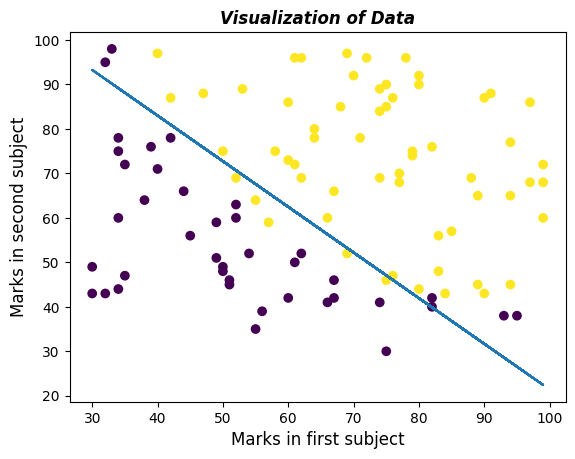

In [20]:
##PLOTTING Decision Boundary
## Converting AX+BY+C=0 into --> y=mx+c1
Y1=(-(clf.intercept_[0])-clf.coef_ [0,0]*X[0])/clf.coef_ [0,1]
plt.plot(X[0],Y1)
########Plotting given data
plt.scatter(X[0],X[1],c=Y)
plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Marks in first subject',fontsize=12)
plt.ylabel('Marks in second subject',fontsize=12)
plt.show()

#### Description of Data
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome.

* Preg: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)

In [21]:
#@title Run this cell to download the dataset.
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/diabetes.csv

In [22]:
# Load the diabetes dataset
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
# Extract features and labels
X = diabetes.drop("Outcome",axis=1)
y = diabetes["Outcome"]


In [27]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [28]:
# Split the data into train and test data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(576, 8) (192, 8) (576,) (192,)


In [29]:
X_train.values.mean(axis=0)

array([  3.74131944, 120.65972222,  69.50520833,  20.49479167,
        80.36284722,  31.98177083,   0.46861806,  32.921875  ])

In [30]:
X_train.values.std(axis=0)
# BIG NO:  X_test.values.mean(axis=0)
# BIG NO:  X_test.values.std(axis=0)

array([  3.30258122,  32.10527674,  18.38383123,  15.41125943,
       116.12260915,   7.61558373,   0.33903031,  11.49754536])

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) ## What is happenning inside?
X_test_scaled = scaler.transform(X_test) ##?


### [Scale-training-Test](https://sebastianraschka.com/faq/docs/scale-training-test.html)

### Apply Logistic Regression

In [36]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
y_pred = LR.predict(X_test_scaled)
print("Accuracy of Logistic Regression is:",accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression is: 0.7291666666666666


In [ ]:
sample=np.array ([[6,148,72,35,0,33.6,0.627,50]])
sample
sample_scaled = scaler.transform(sample) ##
sample_scaled
Sample_pred = LR.predict(sample_scaled)
Sample_pred

### Example dataset API

In [37]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=.2, random_state=42)
print(X)
print(y)

[[ 1.64565359 -0.5364869 ]
 [ 0.11364936  0.56957362]
 [ 0.75778982 -0.33925892]
 [-1.1465619   0.23125702]
 [-0.65526749  0.09032855]
 [-0.61141254  0.94341382]
 [ 0.25117691  0.65032431]
 [ 1.4107341  -0.45469221]
 [ 0.89497257  0.745335  ]
 [ 0.84405962 -0.16877927]
 [ 0.37467657  0.72130109]
 [-0.31526724  0.91578417]
 [ 1.43068262 -0.70039729]
 [-0.67480213  0.93993138]
 [ 2.01262912  0.4119103 ]
 [ 1.29187896  0.4184012 ]
 [ 1.15463488 -0.31605304]
 [ 1.03753549 -0.55041496]
 [ 0.4218645   0.64991305]
 [-0.21225509  0.87247414]
 [-0.10386433  0.11293615]
 [ 1.90626261 -0.19938132]
 [ 0.07396121  0.73311427]
 [-1.07502986  0.3325551 ]
 [ 0.39264481  0.15026426]
 [ 0.3528635   1.00314912]
 [-0.97130023  0.4427774 ]
 [ 2.04182372  0.01713799]
 [ 0.70554044  0.51624034]
 [ 0.6711967  -0.65167966]
 [ 0.97879136  0.84922577]
 [-1.08014322  0.11104414]
 [ 1.87089302 -0.56712726]
 [-0.1549164   1.36984215]
 [ 2.31992371 -0.26324925]
 [ 0.79653035  0.3488401 ]
 [ 0.21723204 -0.4887921 ]
 

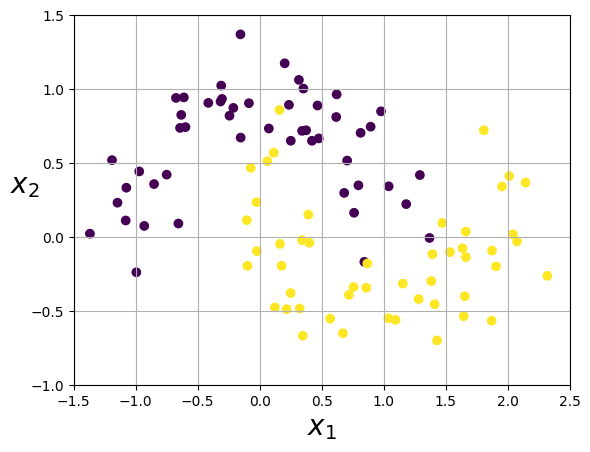

In [38]:
axes=[-1.5, 2.5, -1, 1.5] # how?
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis(axes)
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show()